In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import json
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import mplhep as hep
from sklearn.metrics import roc_curve, auc
from tqdm import tqdm
import copy
import train_evaluate_pnn as te
import csv 
hep.style.use("CMS")
auclist=[]
device = 'cuda' if torch.cuda.is_available() else 'cpu'


def separate_output_score(output_score,y):
    dict_ = {'pred':output_score.cpu().detach().numpy().flatten(),'true':y}
    temp_df = pd.DataFrame(dict_)
    signal_output_score = temp_df.loc[temp_df['true'] == 1]['pred']
    background_output_score = temp_df.loc[temp_df['true'] == 0]['pred']
    return signal_output_score,background_output_score



In [4]:
num_of_features = 5
feature_list = []
sorted_features = {}

signal_masses = ["260","270","280","290","300","320","350","400","450","500","550","600","650","700","750","800","900"]

for signal_mass in signal_masses:
    signal = "GluGluToRadionToHHTo2G2Tau_M-"+signal_mass
    GluGluToRadionToHHTo2G2Tau_AUC_NN = pd.read_csv(f"Feature_list/{signal}_AUC_NN.csv", index_col = False, error_bad_lines=False)
    dict_ = {GluGluToRadionToHHTo2G2Tau_AUC_NN.columns[i]:GluGluToRadionToHHTo2G2Tau_AUC_NN[GluGluToRadionToHHTo2G2Tau_AUC_NN.columns[i]][0] for i in range(len(GluGluToRadionToHHTo2G2Tau_AUC_NN.columns))}
    dict_ = {k: v for k, v in sorted(dict_.items(), key=lambda item: item[1], reverse=True)}
    list_ = list(dict_.keys())
    sorted_features[signal_mass] = list_


for sig in sorted_features.keys():
    for i in range(num_of_features):
        if sorted_features[sig][i] not in feature_list:
            feature_list.append(sorted_features[sig][i])

feature_list = feature_list + ['MX']
print(feature_list)

['reco_MX_mgg', 'dilep_leadpho_mass', 'ditau_pt', 'Diphoton_dPhi', 'ditau_dphi', 'Diphoton_pt_mgg', 'LeadPhoton_pt_mgg', 'MET_pt', 'LeadPhoton_lead_lepton_dR', 'ditau_dR', 'Diphoton_sublead_lepton_dR', 'ditau_met_dPhi', 'SubleadPhoton_lead_lepton_dR', 'lead_lepton_pt', 'jet_1_pt', 'ditau_deta', 'lead_lepton_mass', 'Diphoton_ditau_dphi', 'Diphoton_lead_lepton_deta', 'diphoton_met_dPhi', 'Diphoton_lead_lepton_dR', 'ditau_mass', 'SubleadPhoton_pt_mgg', 'MX']


train
0         -0.299187
1         -1.282540
2          0.342130
3          0.769675
4          0.769675
             ...   
1587475   -0.512959
1587476    0.342130
1587477   -0.085414
1587478   -0.512959
1587479   -1.282540
Name: MX, Length: 1587480, dtype: float64
546553
test
277941
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Epoch 50
Epoch 51
Epoch 52
Epoch 53
Epoch 54
Epoch 55
Epoch 56
Epoch 57
Epoch 58
Epoch 59
Epoch 60
Epoch 61
Epoch 62
Epoch 63
Epoch 64
Epoch 65
Epoch 66
Epoch 67
Epoch 68
Epoch 69
Epoch 70
Epoch 71
Early stopping triggered
>> Training finished
Best model at epoch 68 with l

100%|██████████| 194/194 [00:05<00:00, 35.64it/s]

100%|██████████| 194/194 [00:04<00:00, 44.49it/s]

100%|██████████| 194/194 [00:05<00:00, 36.95it/s]

100%|██████████| 194/194 [00:04<00:00, 44.49it/s]

100%|██████████| 194/194 [00:05<00:00, 37.41it/s]

100%|██████████| 194/194 [00:04<00:00, 44.81it/s]

100%|██████████| 194/194 [00:05<00:00, 36.58it/s]

100%|██████████| 194/194 [00:04<00:00, 44.51it/s]

100%|██████████| 194/194 [00:05<00:00, 37.21it/s]

100%|██████████| 194/194 [00:04<00:00, 44.82it/s]

100%|██████████| 194/194 [00:05<00:00, 36.58it/s]

100%|██████████| 194/194 [00:04<00:00, 44.26it/s]

100%|██████████| 194/194 [00:05<00:00, 36.56it/s]

100%|██████████| 194/194 [00:04<00:00, 44.77it/s]

100%|██████████| 194/194 [00:05<00:00, 37.38it/s]

100%|██████████| 194/194 [00:04<00:00, 44.61it/s]

100%|██████████| 194/194 [00:05<00:00, 37.15it/s]

100%|██████████| 194/194 [00:04<00:00, 43.66it/s]

100%|██████████| 194/194 [00:05<00:00, 36.20it/s]

100%|██████████| 194/194 [00:04

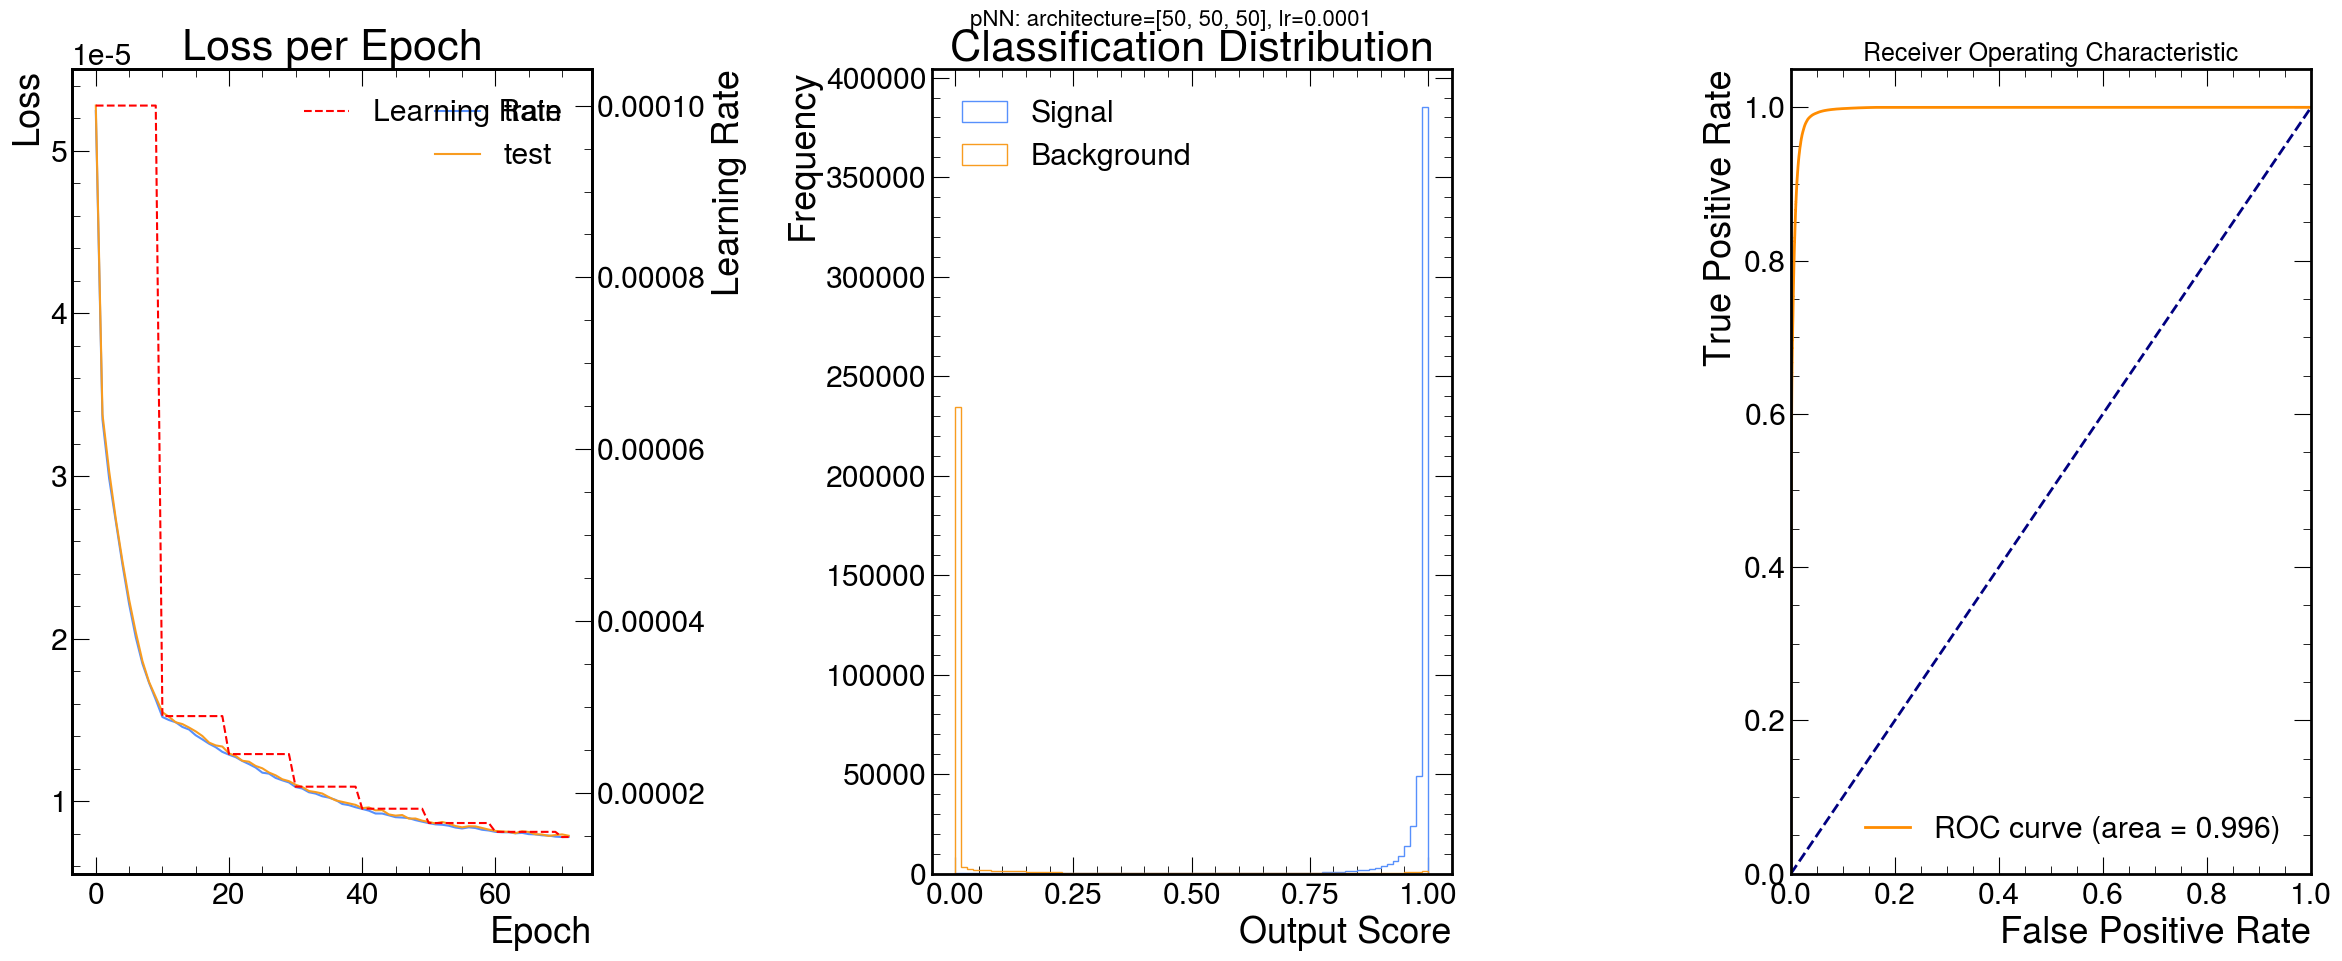

In [6]:

architectures= [[50,50,50]] 

learningrate = 0.0001

plot_learning_rate='yes'
scheduler_type='Custom'

top_number=5

auclist=[]
for nodes in architectures:
    signal_df, background_df, combine_df, add_to_test_df = te.read_dataframes()
    
    x_train,x_test = te.getTrainTestSplit(combine_df,add_to_test_df)
    #x_train,x_test = te.getTrainTestSplit(combine_df)
    
    epoch = 500
#        models,epoch_loss_train,epoch_loss_test,output_score = te.trainNetwork(x_train, x_test, feature_list, 0.001, epoch = epoch, outdir=None, save_models=False, batch_size = 2048)

    models,epoch_loss_train,epoch_loss_test,output_score,output_score_train, learning_rate_epochs = te.trainNetwork_no_weights(x_train, x_test, feature_list, learningrate, epoch = epoch, outdir=None, save_models=False,
                        batch_size = 2048*4, nodes = nodes, model_type='char',scheduler_type=scheduler_type)   

    for i in range(len(models)):
        torch.save(models[i], f'models_5_features/model_epoch_{i}.pth')     
    
    
    signal_output_score,background_output_score = separate_output_score(output_score,x_test['y'])

    print(x_test['y'].isna().sum())
    print(f'outputscore {np.count_nonzero(np.isnan(output_score.cpu().detach().numpy()))}')
    print(output_score.cpu().detach().numpy())
    
    fpr, tpr, thresholds = roc_curve(x_test['y'], output_score.cpu().detach().numpy())
    roc_auc = auc(fpr, tpr)
    print(f'Printing AUC Score:{roc_auc} for pNN of architecture {(nodes)}')
    
    fig, axs = plt.subplots(1, 3, figsize=(24, 10))
        
    axs[0].plot(epoch_loss_train, label = 'train')
    axs[0].plot(epoch_loss_test, label = 'test')
    axs[0].set_ylabel('Loss')
    axs[0].set_xlabel('Epoch')
    axs[0].set_title('Loss per Epoch')
    axs[0].legend(loc='upper right')
    if plot_learning_rate == 'yes':
        ax1_twin = axs[0].twinx()
        ax1_twin.plot(learning_rate_epochs, label='Learning Rate', linestyle='--', color='red')
        ax1_twin.set_ylabel('Learning Rate')
        ax1_twin.tick_params(axis='y')
        
    # ax1_twin.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0))

    axs[1].hist(signal_output_score, label = 'Signal',bins=80,histtype='step')
    axs[1].hist(background_output_score, label = 'Background',bins=80,histtype='step')
    axs[1].set_xlabel("Output Score")
    axs[1].set_title('Classification Distribution')
    axs[1].set_ylabel("Frequency")
    axs[1].legend()
    
    axs[2].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
    axs[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axs[2].set_xlim([0.0, 1.0])
    axs[2].set_ylim([0.0, 1.05])
    axs[2].set_xlabel('False Positive Rate')
    axs[2].set_ylabel('True Positive Rate')
    axs[2].set_title('Receiver Operating Characteristic',fontsize=18)
    axs[2].legend(loc="lower right")
    plt.tight_layout()
    plt.legend()
    #plt.title(f'{signal_names[l]}')
    fig.suptitle(f'pNN: architecture={nodes}, lr={learningrate}', fontsize=16)
    plt.show()
    #plt.savefig(f'lossclassROC_m={mass}_arch={nodes}_lr={learningrate}.png')
    #plt.savefig(f'savetrial1000.png')

    
    auclist.append([roc_auc,nodes])
    
featurescore_df = pd.DataFrame(auclist, columns=['score', 'nodes per hidden layer'])
    
    #output_file_path = f'OptimisedArch310124_{mass}_lr{learningrate}_[50,50,50].csv'
    #featurescore_df.to_csv(output_file_path, index=False)
         
